## Data Visualiztion

- 날씨가 자전거 사용에 어떤 영향을 미치는지
- 특정 기간 사이의 총 자전거 대여횟수는 어느정도인지

In [1]:
import numpy as np
import pandas as pd
import os
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder = 'C:/Users/su/OneDrive - 청주대학교 (1)/datasets/before/2023'
file_name = '[2023_05_21]London_bike_sharing'
bike = 'london_merged.csv'

In [3]:
bike_data = pd.read_csv(os.path.join(folder, file_name, bike))

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "wind_speed" - wind speed in km/h
- "weather_code" - category of the weather
- "is_holiday" - boolean field - 1 holiday / 0 non holiday
- "is_weekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
- "weather_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [4]:
bike_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
bike_data.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


#### 날씨가 자전거 사용에 미치는 영향

C:\Users\su\AppData\Local\Temp/ipykernel_16536/479821429.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_data.corr(),cmap=cmap,square=True,linewidths=.5,center=0,linecolor="black", annot=True)


<AxesSubplot:>

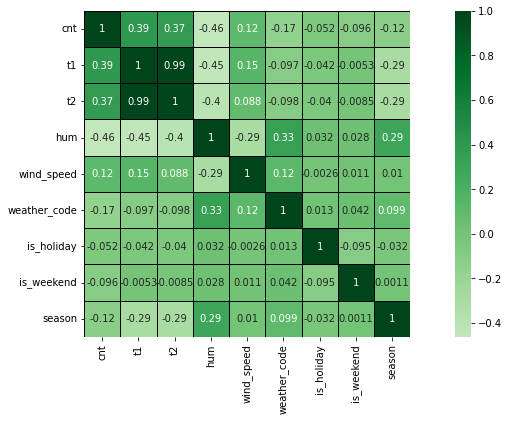

In [7]:
# t1, t2, hum, wind_speed, weather_code
plt.figure(figsize=(16,6))
cmap = 'YlGnBu'
cmap = 'Greens'
# cmap = 'seagreen'
sns.heatmap(bike_data.corr(),cmap=cmap,square=True,linewidths=.5,center=0,linecolor="black", annot=True)

In [8]:
bike_data.timestamp = bike_data.timestamp.astype('datetime64')
# index를 timestamp로 해야 resample이 가능함.
bike_data = bike_data.set_index('timestamp')

In [9]:
bike_data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- 온도(t1, t2)에 가장 영향을 많이 받고, 그 다음 풍속(wind_speed)에 영향을 많이 받으며, 습도(hum)와는 거의 관계가 없음을 알 수 있음

#### - 매일, 월별, 시간 별 자전거 대여 횟수

- 매일

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

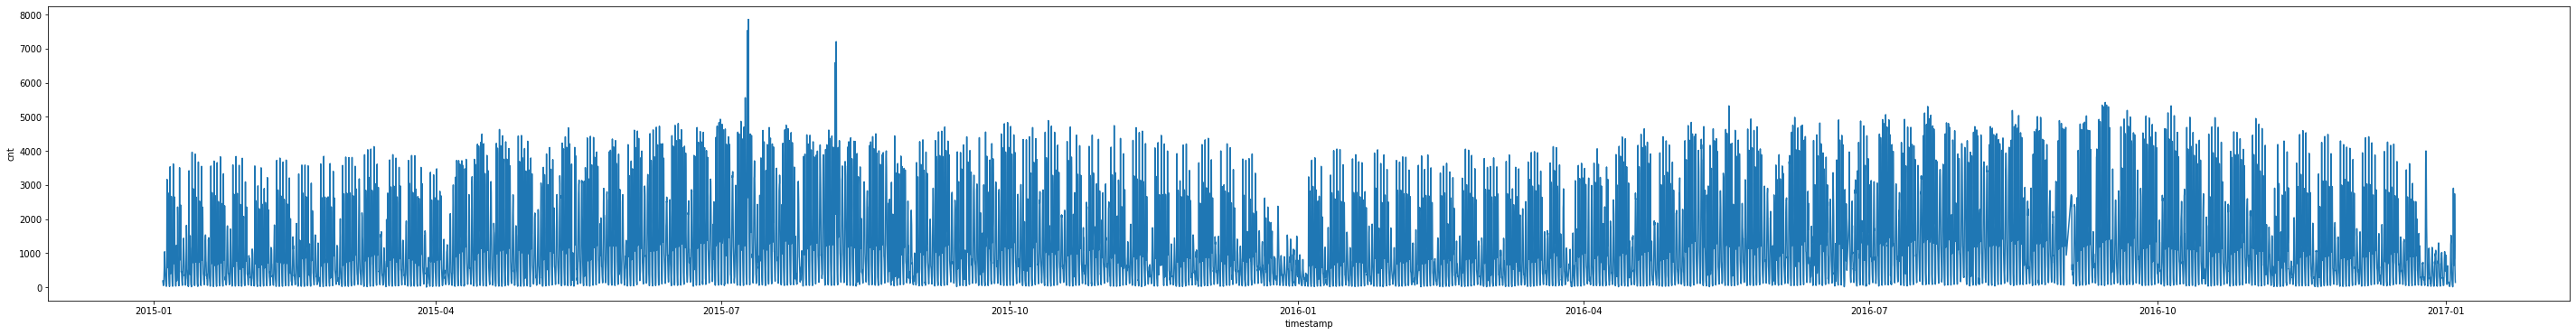

In [10]:
plt.figure(figsize=(50,6))
x = bike_data.index
sns.lineplot(data=bike_data,x=x, y=bike_data.cnt)

[ resample() 메소드의 시간 단위 구간 설정 ]

- 5분 단위 구간    : resample('5T')

- 10분 단위 구간  : resample('10T')

- 20분 단위 구간 : resample('20T')

- 1시간 단위 구간 : resample('1H')

- 1일 단위 구간    : resample('1D')

- 1주일 단위 구각 : resample('1W')

- 1달 단위 구간    : resample('1M')

- 1년 단위 구간    : resample('1Y')

In [11]:
bike_data_month = bike_data.resample("1M").sum()
bike_data_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0


- 2년간 달마다 자전거를 대여한 횟수

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

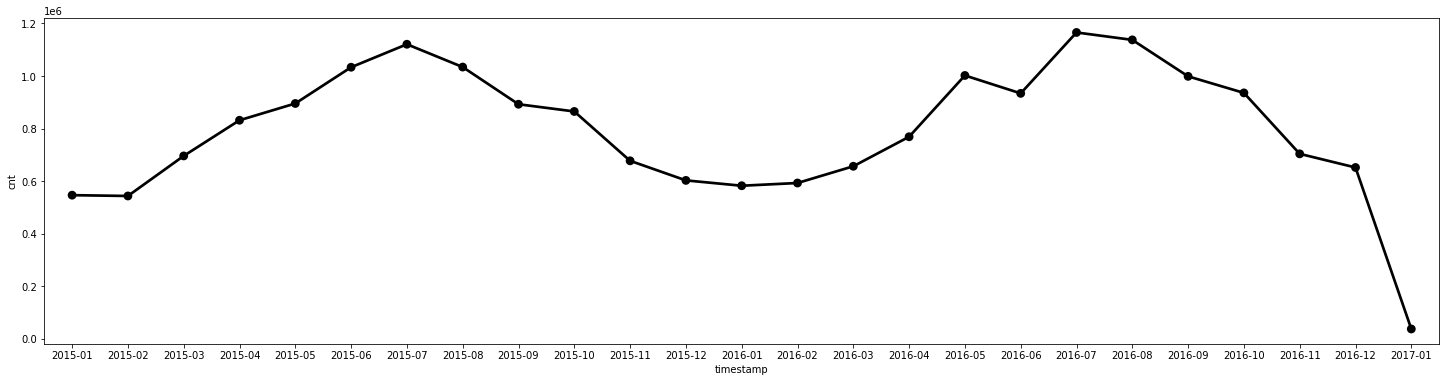

In [12]:
plt.figure(figsize=(25,6))
sns.pointplot(data=bike_data_month, x=bike_data_month.index.strftime('%Y-%m'), y=bike_data_month.cnt, color="black")

- 시간 별, 휴가 별

Text(0.5, 0, 'hour')

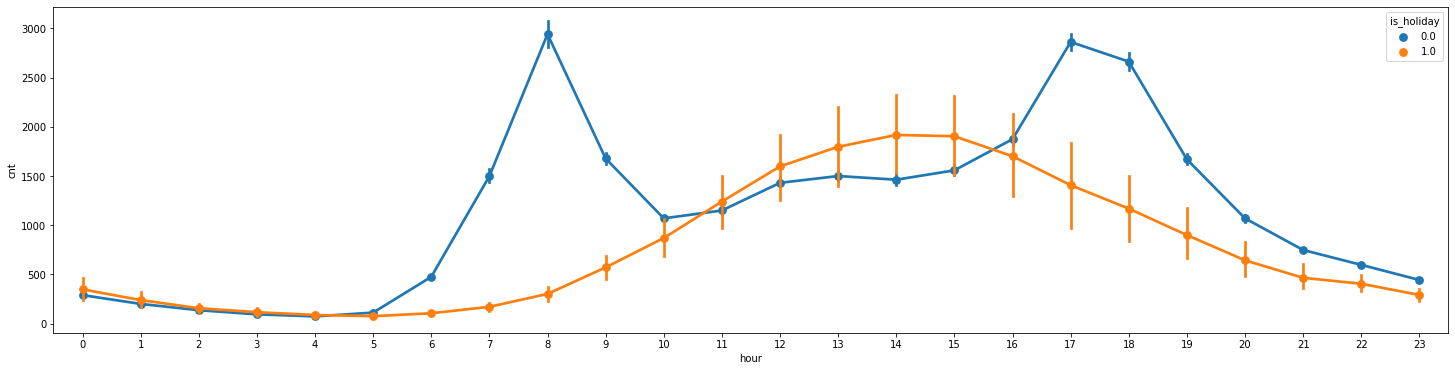

In [13]:
plt.figure(figsize=(25,6))
sns.pointplot(data=bike_data,x=bike_data.index.hour,y=bike_data.cnt, hue=bike_data.is_holiday)
plt.xlabel("hour")

- 시간 별, 계절 별

Text(0.5, 0, 'hour')

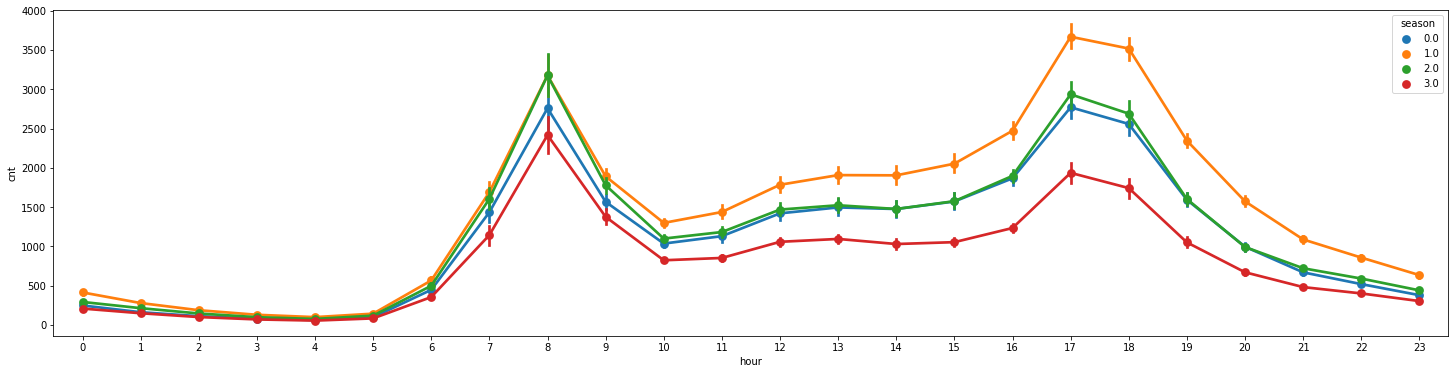

In [14]:
plt.figure(figsize=(25,6))
sns.pointplot(data=bike_data,x=bike_data.index.hour,y=bike_data.cnt, hue=bike_data.season)
plt.xlabel("hour")

- 월 별, 계절 별

Text(0.5, 0, 'season')

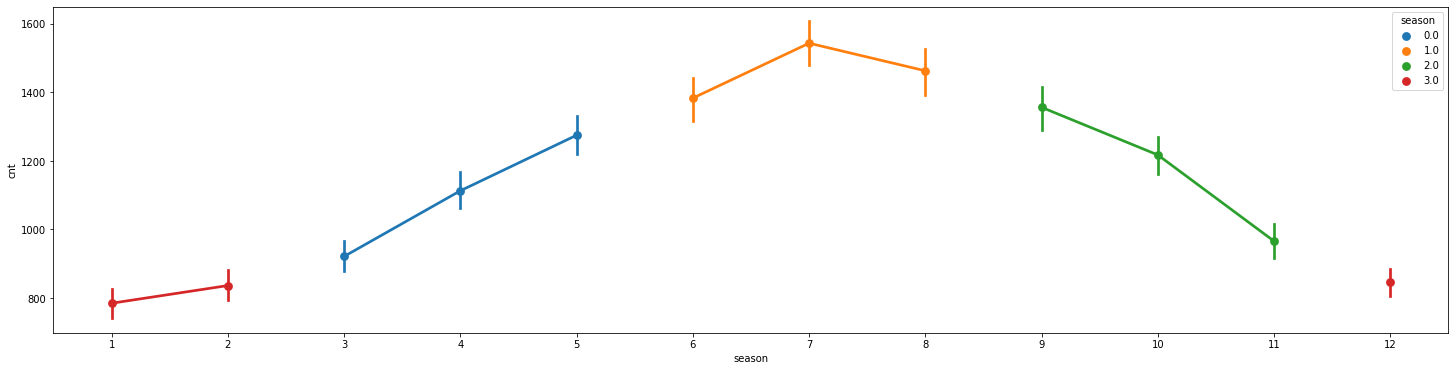

In [15]:
plt.figure(figsize=(25,6))
sns.pointplot(data=bike_data,x=bike_data.index.month,y=bike_data.cnt, hue=bike_data.season)
plt.xlabel("season")

- 주간 별, 계절 별

Text(0.5, 0, 'day_of_week')

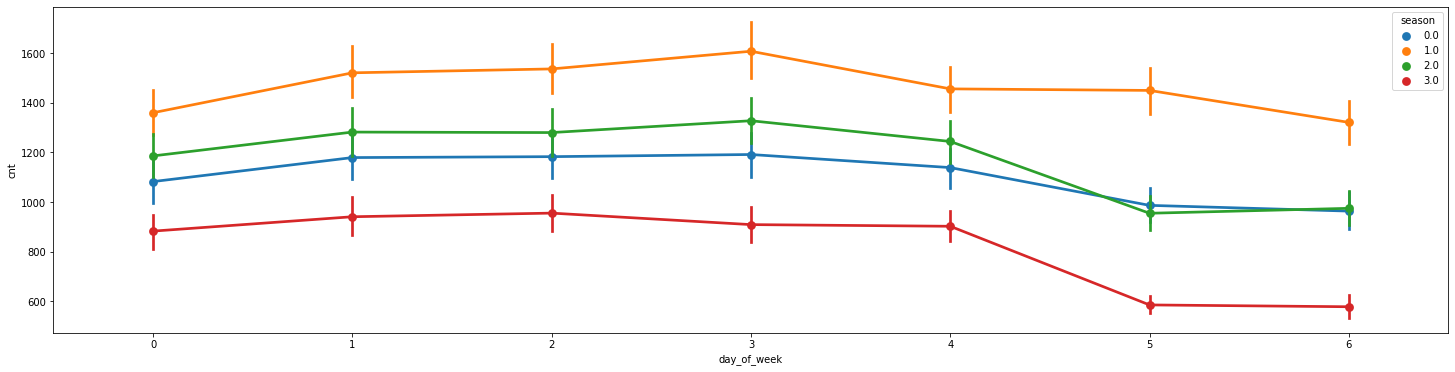

In [16]:
plt.figure(figsize=(25,6))
sns.pointplot(data=bike_data,x=bike_data.index.day_of_week,y=bike_data.cnt, hue=bike_data.season)
plt.xlabel("day_of_week")

- 일 별, 계절 별

Text(0.5, 0, 'day')

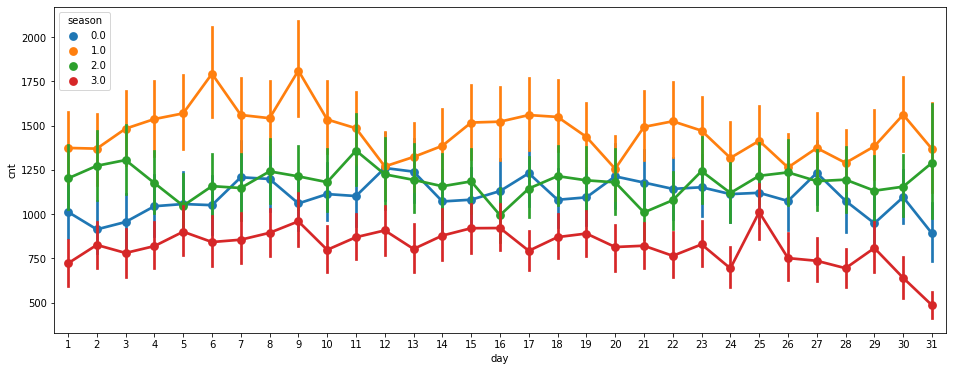

In [17]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike_data,x=bike_data.index.day,y=bike_data.cnt, hue=bike_data.season)
plt.xlabel("day")

- london의 계절별 온도

Text(0.5, 0, 'day')

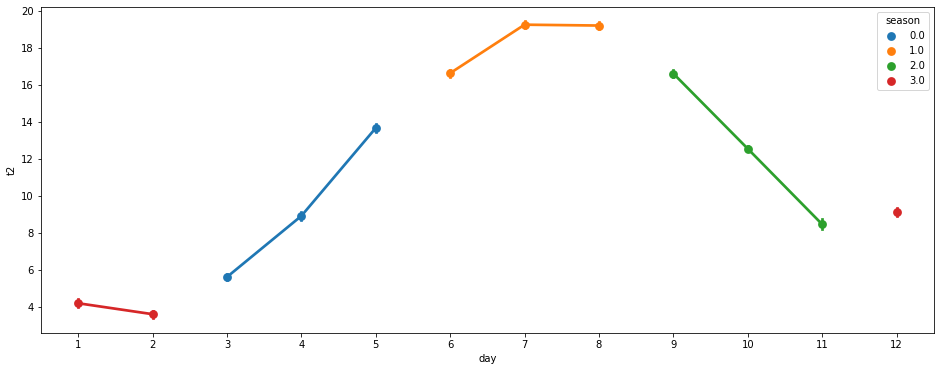

In [18]:
plt.figure(figsize=(16,6))
sns.pointplot(data=bike_data,x=bike_data.index.month,y=bike_data.t2, hue=bike_data.season)
plt.xlabel("day")

#### Data preprocessing
- cnt 예측

- training set, test set

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bike_data, test_size=0.1, random_state=0)

print(train.shape)
print(test.shape)

(15672, 9)
(1742, 9)


In [20]:
train.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
num_colu = train.columns.drop(['cnt']) 
trans_1 = scaler.fit(train[num_colu].to_numpy())


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

num_colu = train.columns.drop(['cnt']) 
trans_1 = scaler.fit(train[num_colu].to_numpy())
train.loc[:,num_colu] = trans_1.transform(train[num_colu].to_numpy())
test.loc[:,num_colu] = trans_1.transform(test[num_colu].to_numpy())

cnt_scaler = MinMaxScaler()
trans_2 = cnt_scaler.fit(train[["cnt"]])
train["cnt"] = trans_2.transform(train[["cnt"]])
test["cnt"] = trans_2.transform(test[["cnt"]])

In [23]:
from tqdm import notebook as nb
nb.tqdm.pandas()
def prepare_data(x,y,time_steps=1):
    x_t = [x.iloc[i:(i+time_steps)].to_numpy() for i in range(len(x) - time_steps)]
    y_t = [y.iloc[i+time_steps] for i in range(len(y) - time_steps)]
    return np.array(x_t),np.array(y_t)

steps = 24
x_train , y_train = prepare_data(train, train.cnt, time_steps=steps)
x_test , y_test = prepare_data(test, test.cnt, time_steps=steps)
print(f"X_train : {x_train.shape}\nX_test : {x_test.shape}\ny_train : {y_train.shape}\ny_test: {y_test.shape}")

X_train : (15648, 24, 9)
X_test : (1718, 24, 9)
y_train : (15648,)
y_test: (1718,)


##### Model building

Epoch 1/100
414/414 [==============================] - ETA: 0s - loss: 2.0964 - accuracy: 0.2835
Epoch 1: val_accuracy improved from -inf to 0.30251, saving model to 01-0.3025
INFO:tensorflow:Assets written to: 01-0.3025\assets


INFO:tensorflow:Assets written to: 01-0.3025\assets


414/414 [==============================] - 10s 23ms/step - loss: 2.0964 - accuracy: 0.2835 - val_loss: 1.4004 - val_accuracy: 0.3025
Epoch 2/100
413/414 [============================>.] - ETA: 0s - loss: 1.3690 - accuracy: 0.3074
Epoch 2: val_accuracy did not improve from 0.30251
414/414 [==============================] - 9s 21ms/step - loss: 1.3690 - accuracy: 0.3074 - val_loss: 1.4741 - val_accuracy: 0.2789
Epoch 3/100
413/414 [============================>.] - ETA: 0s - loss: 1.3458 - accuracy: 0.3309
Epoch 3: val_accuracy improved from 0.30251 to 0.32245, saving model to 03-0.3225
INFO:tensorflow:Assets written to: 03-0.3225\assets


INFO:tensorflow:Assets written to: 03-0.3225\assets


414/414 [==============================] - 9s 23ms/step - loss: 1.3455 - accuracy: 0.3311 - val_loss: 1.3223 - val_accuracy: 0.3225
Epoch 4/100
413/414 [============================>.] - ETA: 0s - loss: 1.1781 - accuracy: 0.4408
Epoch 4: val_accuracy improved from 0.32245 to 0.50620, saving model to 04-0.5062
INFO:tensorflow:Assets written to: 04-0.5062\assets


INFO:tensorflow:Assets written to: 04-0.5062\assets


414/414 [==============================] - 10s 23ms/step - loss: 1.1781 - accuracy: 0.4407 - val_loss: 1.0764 - val_accuracy: 0.5062
Epoch 5/100
413/414 [============================>.] - ETA: 0s - loss: 1.0817 - accuracy: 0.4948
Epoch 5: val_accuracy improved from 0.50620 to 0.52705, saving model to 05-0.5270
INFO:tensorflow:Assets written to: 05-0.5270\assets


INFO:tensorflow:Assets written to: 05-0.5270\assets


414/414 [==============================] - 9s 23ms/step - loss: 1.0818 - accuracy: 0.4949 - val_loss: 1.0393 - val_accuracy: 0.5270
Epoch 6/100
413/414 [============================>.] - ETA: 0s - loss: 1.0610 - accuracy: 0.5025
Epoch 6: val_accuracy did not improve from 0.52705
414/414 [==============================] - 8s 20ms/step - loss: 1.0609 - accuracy: 0.5025 - val_loss: 1.0590 - val_accuracy: 0.4853
Epoch 7/100
411/414 [============================>.] - ETA: 0s - loss: 1.0507 - accuracy: 0.5094
Epoch 7: val_accuracy improved from 0.52705 to 0.52735, saving model to 07-0.5273
INFO:tensorflow:Assets written to: 07-0.5273\assets


INFO:tensorflow:Assets written to: 07-0.5273\assets


414/414 [==============================] - 10s 23ms/step - loss: 1.0505 - accuracy: 0.5096 - val_loss: 1.0184 - val_accuracy: 0.5273
Epoch 8/100
412/414 [============================>.] - ETA: 0s - loss: 1.0437 - accuracy: 0.5130
Epoch 8: val_accuracy improved from 0.52735 to 0.53067, saving model to 08-0.5307
INFO:tensorflow:Assets written to: 08-0.5307\assets


INFO:tensorflow:Assets written to: 08-0.5307\assets


414/414 [==============================] - 9s 22ms/step - loss: 1.0440 - accuracy: 0.5131 - val_loss: 1.0293 - val_accuracy: 0.5307
Epoch 9/100
414/414 [==============================] - ETA: 0s - loss: 1.0414 - accuracy: 0.5151
Epoch 9: val_accuracy did not improve from 0.53067
414/414 [==============================] - 8s 19ms/step - loss: 1.0414 - accuracy: 0.5151 - val_loss: 1.0515 - val_accuracy: 0.4980
Epoch 10/100
413/414 [============================>.] - ETA: 0s - loss: 1.0268 - accuracy: 0.5194
Epoch 10: val_accuracy improved from 0.53067 to 0.54276, saving model to 10-0.5428
INFO:tensorflow:Assets written to: 10-0.5428\assets


INFO:tensorflow:Assets written to: 10-0.5428\assets


414/414 [==============================] - 9s 21ms/step - loss: 1.0269 - accuracy: 0.5193 - val_loss: 1.0149 - val_accuracy: 0.5428
Epoch 11/100
411/414 [============================>.] - ETA: 0s - loss: 1.0294 - accuracy: 0.5283
Epoch 11: val_accuracy did not improve from 0.54276
414/414 [==============================] - 8s 20ms/step - loss: 1.0288 - accuracy: 0.5286 - val_loss: 0.9965 - val_accuracy: 0.5301
Epoch 12/100
412/414 [============================>.] - ETA: 0s - loss: 1.0357 - accuracy: 0.5195
Epoch 12: val_accuracy did not improve from 0.54276
414/414 [==============================] - 8s 19ms/step - loss: 1.0364 - accuracy: 0.5194 - val_loss: 1.0144 - val_accuracy: 0.5319
Epoch 13/100
414/414 [==============================] - ETA: 0s - loss: 1.0234 - accuracy: 0.5282
Epoch 13: val_accuracy did not improve from 0.54276
414/414 [==============================] - 8s 19ms/step - loss: 1.0234 - accuracy: 0.5282 - val_loss: 0.9996 - val_accuracy: 0.5367
Epoch 14/100
414/414 [

INFO:tensorflow:Assets written to: 15-0.5494\assets


414/414 [==============================] - 9s 22ms/step - loss: 1.0182 - accuracy: 0.5272 - val_loss: 1.0020 - val_accuracy: 0.5494
Epoch 16/100
412/414 [============================>.] - ETA: 0s - loss: 1.0120 - accuracy: 0.5387
Epoch 16: val_accuracy did not improve from 0.54941
414/414 [==============================] - 8s 20ms/step - loss: 1.0119 - accuracy: 0.5389 - val_loss: 1.0033 - val_accuracy: 0.5455
Epoch 17/100
411/414 [============================>.] - ETA: 0s - loss: 1.0111 - accuracy: 0.5388
Epoch 17: val_accuracy improved from 0.54941 to 0.56482, saving model to 17-0.5648
INFO:tensorflow:Assets written to: 17-0.5648\assets


INFO:tensorflow:Assets written to: 17-0.5648\assets


414/414 [==============================] - 9s 22ms/step - loss: 1.0117 - accuracy: 0.5388 - val_loss: 0.9723 - val_accuracy: 0.5648
Epoch 18/100
413/414 [============================>.] - ETA: 0s - loss: 1.0024 - accuracy: 0.5459
Epoch 18: val_accuracy did not improve from 0.56482
414/414 [==============================] - 8s 20ms/step - loss: 1.0028 - accuracy: 0.5456 - val_loss: 1.0489 - val_accuracy: 0.5328
Epoch 19/100
414/414 [==============================] - ETA: 0s - loss: 1.0023 - accuracy: 0.5456
Epoch 19: val_accuracy did not improve from 0.56482
414/414 [==============================] - 8s 19ms/step - loss: 1.0023 - accuracy: 0.5456 - val_loss: 1.0132 - val_accuracy: 0.5419
Epoch 20/100
414/414 [==============================] - ETA: 0s - loss: 0.9950 - accuracy: 0.5553
Epoch 20: val_accuracy improved from 0.56482 to 0.56875, saving model to 20-0.5688
INFO:tensorflow:Assets written to: 20-0.5688\assets


INFO:tensorflow:Assets written to: 20-0.5688\assets


414/414 [==============================] - 8s 20ms/step - loss: 0.9950 - accuracy: 0.5553 - val_loss: 0.9758 - val_accuracy: 0.5688
Epoch 21/100
411/414 [============================>.] - ETA: 0s - loss: 0.9856 - accuracy: 0.5603
Epoch 21: val_accuracy did not improve from 0.56875
414/414 [==============================] - 8s 19ms/step - loss: 0.9860 - accuracy: 0.5598 - val_loss: 1.0007 - val_accuracy: 0.5555
Epoch 22/100
414/414 [==============================] - ETA: 0s - loss: 0.9869 - accuracy: 0.5626
Epoch 22: val_accuracy improved from 0.56875 to 0.57993, saving model to 22-0.5799
INFO:tensorflow:Assets written to: 22-0.5799\assets


INFO:tensorflow:Assets written to: 22-0.5799\assets


414/414 [==============================] - 10s 23ms/step - loss: 0.9869 - accuracy: 0.5626 - val_loss: 0.9432 - val_accuracy: 0.5799
Epoch 23/100
414/414 [==============================] - ETA: 0s - loss: 0.9822 - accuracy: 0.5742
Epoch 23: val_accuracy did not improve from 0.57993
414/414 [==============================] - 8s 19ms/step - loss: 0.9822 - accuracy: 0.5742 - val_loss: 0.9678 - val_accuracy: 0.5799
Epoch 24/100
414/414 [==============================] - ETA: 0s - loss: 0.9704 - accuracy: 0.5731
Epoch 24: val_accuracy improved from 0.57993 to 0.58447, saving model to 24-0.5845
INFO:tensorflow:Assets written to: 24-0.5845\assets


INFO:tensorflow:Assets written to: 24-0.5845\assets


414/414 [==============================] - 8s 20ms/step - loss: 0.9704 - accuracy: 0.5731 - val_loss: 0.9601 - val_accuracy: 0.5845
Epoch 25/100
414/414 [==============================] - ETA: 0s - loss: 0.9718 - accuracy: 0.5718
Epoch 25: val_accuracy did not improve from 0.58447
414/414 [==============================] - 8s 20ms/step - loss: 0.9718 - accuracy: 0.5718 - val_loss: 0.9493 - val_accuracy: 0.5811
Epoch 26/100
414/414 [==============================] - ETA: 0s - loss: 0.9655 - accuracy: 0.5741
Epoch 26: val_accuracy did not improve from 0.58447
414/414 [==============================] - 9s 21ms/step - loss: 0.9655 - accuracy: 0.5741 - val_loss: 1.0304 - val_accuracy: 0.5328
Epoch 27/100
413/414 [============================>.] - ETA: 0s - loss: 0.9688 - accuracy: 0.5770
Epoch 27: val_accuracy improved from 0.58447 to 0.59263, saving model to 27-0.5926
INFO:tensorflow:Assets written to: 27-0.5926\assets


INFO:tensorflow:Assets written to: 27-0.5926\assets


414/414 [==============================] - 9s 21ms/step - loss: 0.9685 - accuracy: 0.5770 - val_loss: 0.9404 - val_accuracy: 0.5926
Epoch 28/100
414/414 [==============================] - ETA: 0s - loss: 0.9618 - accuracy: 0.5798
Epoch 28: val_accuracy improved from 0.59263 to 0.59353, saving model to 28-0.5935
INFO:tensorflow:Assets written to: 28-0.5935\assets


INFO:tensorflow:Assets written to: 28-0.5935\assets


414/414 [==============================] - 9s 23ms/step - loss: 0.9618 - accuracy: 0.5798 - val_loss: 0.9295 - val_accuracy: 0.5935
Epoch 29/100
413/414 [============================>.] - ETA: 0s - loss: 0.9656 - accuracy: 0.5803
Epoch 29: val_accuracy did not improve from 0.59353
414/414 [==============================] - 8s 20ms/step - loss: 0.9654 - accuracy: 0.5804 - val_loss: 0.9285 - val_accuracy: 0.5920
Epoch 30/100
413/414 [============================>.] - ETA: 0s - loss: 0.9608 - accuracy: 0.5771
Epoch 30: val_accuracy did not improve from 0.59353
414/414 [==============================] - 9s 21ms/step - loss: 0.9609 - accuracy: 0.5769 - val_loss: 0.9885 - val_accuracy: 0.5703
Epoch 31/100
411/414 [============================>.] - ETA: 0s - loss: 0.9596 - accuracy: 0.5788
Epoch 31: val_accuracy did not improve from 0.59353
414/414 [==============================] - 8s 19ms/step - loss: 0.9591 - accuracy: 0.5790 - val_loss: 0.9249 - val_accuracy: 0.5863
Epoch 32/100
412/414 [

INFO:tensorflow:Assets written to: 35-0.5999\assets


414/414 [==============================] - 8s 20ms/step - loss: 0.9670 - accuracy: 0.5797 - val_loss: 0.9408 - val_accuracy: 0.5999
Epoch 36/100
412/414 [============================>.] - ETA: 0s - loss: 0.9490 - accuracy: 0.5872
Epoch 36: val_accuracy did not improve from 0.59988
414/414 [==============================] - 8s 20ms/step - loss: 0.9494 - accuracy: 0.5871 - val_loss: 1.0270 - val_accuracy: 0.5409
Epoch 37/100
411/414 [============================>.] - ETA: 0s - loss: 0.9462 - accuracy: 0.5887
Epoch 37: val_accuracy did not improve from 0.59988
414/414 [==============================] - 8s 19ms/step - loss: 0.9459 - accuracy: 0.5892 - val_loss: 0.9279 - val_accuracy: 0.5969
Epoch 38/100
412/414 [============================>.] - ETA: 0s - loss: 0.9542 - accuracy: 0.5856
Epoch 38: val_accuracy improved from 0.59988 to 0.60804, saving model to 38-0.6080
INFO:tensorflow:Assets written to: 38-0.6080\assets


INFO:tensorflow:Assets written to: 38-0.6080\assets


414/414 [==============================] - 9s 23ms/step - loss: 0.9538 - accuracy: 0.5857 - val_loss: 0.9097 - val_accuracy: 0.6080
Epoch 39/100
412/414 [============================>.] - ETA: 0s - loss: 0.9449 - accuracy: 0.5893
Epoch 39: val_accuracy did not improve from 0.60804
414/414 [==============================] - 8s 19ms/step - loss: 0.9455 - accuracy: 0.5892 - val_loss: 1.0102 - val_accuracy: 0.5539
Epoch 40/100
414/414 [==============================] - ETA: 0s - loss: 0.9485 - accuracy: 0.5861
Epoch 40: val_accuracy did not improve from 0.60804
414/414 [==============================] - 8s 19ms/step - loss: 0.9485 - accuracy: 0.5861 - val_loss: 0.9346 - val_accuracy: 0.5947
Epoch 41/100
411/414 [============================>.] - ETA: 0s - loss: 0.9438 - accuracy: 0.5909
Epoch 41: val_accuracy did not improve from 0.60804
414/414 [==============================] - 8s 20ms/step - loss: 0.9443 - accuracy: 0.5908 - val_loss: 0.9507 - val_accuracy: 0.5824
Epoch 42/100
413/414 [

Text(0, 0.5, 'val_accuracy')

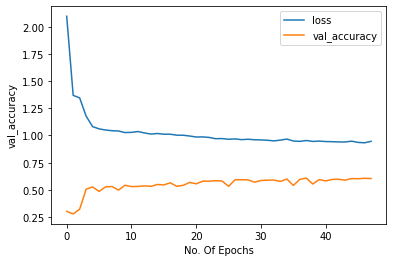

In [36]:
### LSTM model
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional
from keras.utils import to_categorical

data_y = to_categorical(bike_data.season)
target = bike_data.season
columns = bike_data.columns.drop('season')

input_data = bike_data[columns]

x_train, x_test, y_train, y_test = train_test_split(input_data, target, test_size=0.05, stratify=target, random_state=0)
model=tf.keras.models.Sequential(

    [
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dense(500, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1500, activation='relu'),
     tf.keras.layers.Dropout(0.15),
     tf.keras.layers.Dense((data_y.shape[1]), activation='softmax')
     ]
)
opt = tf.keras.optimizers.Adam(learning_rate = 0.002)
model.compile(optimizer = opt, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model_name = '{epoch:02d}-{val_accuracy:.4f}'
es = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
mc = ModelCheckpoint(model_name, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')
callbacks = [es, mc]

epochs = 100
batch_size = 32
prepared_model = model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=0.2,
    # validation_data=[x_test, y_test]
    callbacks=callbacks,
    
    )

plt.plot(prepared_model.history["loss"], label="loss")
plt.plot(prepared_model.history["val_accuracy"], label="val_accuracy")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("val_accuracy")

In [37]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.6005


[0.9108070135116577, 0.6004592180252075]

In [57]:
y_test

timestamp
2015-09-23 10:00:00    2.0
2015-11-26 16:00:00    2.0
2015-09-02 14:00:00    2.0
2016-08-19 21:00:00    1.0
2015-07-09 04:00:00    1.0
                      ... 
2015-09-07 14:00:00    2.0
2016-03-04 18:00:00    0.0
2015-02-15 21:00:00    3.0
2015-12-16 10:00:00    3.0
2016-03-08 01:00:00    0.0
Name: season, Length: 871, dtype: float64

In [63]:
pred = model.predict(x_test, ).argmax(axis=1)
re = np.where(y_test.values != pred)
print(f'{len(pred)}일 중 {len(re[0])}일을 맞추지 못함.\n정확도 : 약 {(1 - len(re[0])/len(pred))*100:.3f}%')

28/28 [==============================] - 0s 5ms/step
871일 중 348일을 맞추지 못함.
정확도 : 약 60.046%


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target_column = ['season']
target_column = ['is_holiday']
drop_column = ['t2',] + target_column
target = bike_data[target_column]
columns = bike_data.columns.drop(drop_column)
input_data = bike_data[columns]
x_train, x_valid, y_train, y_valid = train_test_split(input_data, target, test_size=0.2, stratify=target, random_state=0)

def ml_fit(model, x_train, y_train, x_valid, y_valid, target_column):
    model.fit(x_train, y_train)

    score = model.score(x_valid, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}일 중 {score * 100:.3f}% 정확도로 {target_column}을 맞춤')
    return model
# rf_model = ml_fit(RandomForestClassifier(n_estimators=100), x_train, y_train, x_test, y_test)
rf_model = ml_fit(RandomForestClassifier(n_estimators=150), x_train, y_train, x_valid, y_valid, target_column) # 68.648%
# gbc_model = ml_fit(GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0), x_train, y_train, x_valid, y_valid, temp)
# gbc_model = ml_fit(GradientBoostingClassifier(n_estimators=150, learning_rate=0.002, max_depth=1, random_state=0), x_train, y_train, x_valid, y_valid, temp)
# rf_model = ml_fit(RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1), x_train, y_train, x_valid, y_valid, temp)
# rf_model = ml_fit(RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10), x_train, y_train, x_test, y_test)
# lr_model = ml_fit(LogisticRegression(solver='lbfgs'), x_train, y_train, x_test, y_test)
# svc_model = ml_fit(SVC(gamma='scale'), x_train, y_train, x_test, y_test)
# kn_model = ml_fit(KNeighborsClassifier(), x_train, y_train, x_test, y_test)
# ga_model = ml_fit(GaussianNB(), x_train, y_train, x_test, y_test)
# dt_model = ml_fit(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

C:\Users\su\AppData\Local\Temp/ipykernel_16536/610516023.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=150)
총 3483일 중 97.875% 정확도로 ['is_holiday']을 맞춤


In [62]:
predict_result = rf_model.predict(x_valid)

re = np.where(y_valid.is_holiday != predict_result)
print(f'{len(predict_result)}일 중 {len(re[0])}일을 맞추지 못함.\n정확도 : 약 {(1 - len(re[0])/len(predict_result))*100:.3f}%')

3483일 중 74일을 맞추지 못함.
정확도 : 약 97.875%


In [37]:
temp = bike_data.sort_values(by='cnt', ascending=False).head(1000)
temp[bike_data.sort_values(by='cnt', ascending=False).head(1000).is_weekend	== 0.0]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0
2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2.0,0.0,0.0,1.0
2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1.0,0.0,0.0,1.0
2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2015-10-07 18:00:00,3349,15.0,15.0,72.0,21.0,3.0,0.0,0.0,2.0
2015-08-25 18:00:00,3348,19.5,19.5,78.0,24.0,2.0,0.0,0.0,1.0
2015-12-18 08:00:00,3343,13.0,13.0,79.5,18.0,3.0,0.0,0.0,3.0
